**Coordinate search applied to minimize a simple quadratic**

Compare the results from random search algorithm and cooridnate search algorithm on the following simple quadratic  𝑔(𝑤1,𝑤2)=𝑤21+𝑤22+2. 

In [4]:
import numpy as np
np.random.seed(0)

In [5]:
# random search function
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

In [6]:
# zero order coordinate search
def coordinate_search(g,alpha_choice,max_its,w):
    # construct set of all coordinate directions
    directions_plus = np.eye(np.size(w),np.size(w))
    directions_minus = - np.eye(np.size(w),np.size(w))
    directions = np.concatenate((directions_plus,directions_minus),axis=0)
        
    # run coordinate search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w)
        cost_history.append(g(w))
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w)
    cost_history.append(g(w))
    return weight_history,cost_history

For both algorithms, we use  𝑤0=[34]𝑇,𝛼=1,𝑃=10000  and  𝐾=10 .

In [7]:
np.random.seed(0)
# define function
g = lambda w: np.dot(w.T,w) + 2

# run random search algorithm 
alpha_choice = 1; w = np.array([3,4]); num_samples = 10000; max_its = 10;
weight_history_1,cost_history_1 = random_search(g,alpha_choice,max_its,w,num_samples)

# run coordinate search algorithm 
alpha_choice = 1; w = np.array([3,4]); max_its = 10;
weight_history_2,cost_history_2 = coordinate_search(g,alpha_choice,max_its,w)

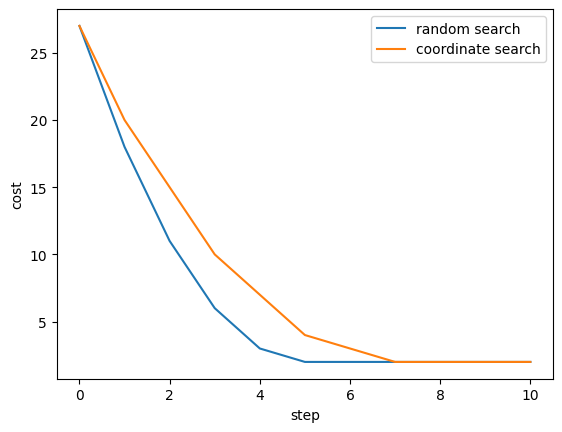

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history_1);
plt.plot(cost_history_2);
plt.xlabel("step");
plt.ylabel("cost");
plt.legend(["random search", "coordinate search"]);